In [1]:
from models import Entity, Environment
import numpy as np
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt
import time

In [2]:
x_arr = torch.linspace(-1, 1, 500)
y_arr = torch.exp(x_arr) + torch.normal(0, 0.02, size=(500,))
dataset = Data.TensorDataset(x_arr.unsqueeze(1),y_arr.unsqueeze(1))
train_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

In [3]:
x_val = torch.linspace(1, 1.2, 50)
y_val = torch.exp(x_val) + torch.normal(0, 0.02, size=(50,))
dataset = Data.TensorDataset(x_val.unsqueeze(1), y_val.unsqueeze(1))
val_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

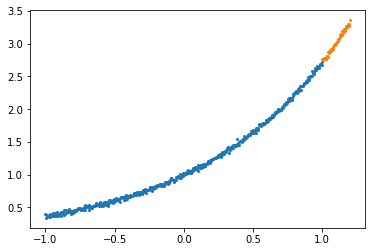

In [4]:
plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=2)
plt.plot(x_val, y_val, marker="o", lw=0, markersize=2)

In [5]:
env = Environment(10, train_loader, train_epochs=20, validation_loader=val_loader)

cuda


In [6]:
env.train_epoch()

In [7]:
env.validate_entities()

[nan,
 0.026636948734521864,
 0.03059614270925522,
 0.48092232704162596,
 0.0037013547867536544,
 0.08962450683116913,
 0.5740872764587402,
 0.02911730334162712,
 0.39867558479309084,
 0.2871609902381897]

In [30]:
m = env.entities[3]
print(m.entity_history)
print(m.color)
print(m.gens)

[nan, nan, 0.8191136074066161]
0
{'layers': [{'type': 'Linear', 'in': 1, 'out': 43}, {'type': 'ReLU', 'in': 43, 'out': 43}, {'type': 'Sigmoid', 'in': 43, 'out': 43}, {'type': 'Linear', 'in': 43, 'out': 1}, {'type': 'Sigmoid', 'in': 1, 'out': 1}], 'criterion': 'MSELoss', 'optimizer': {'momentum': 0.20130593096547167, 'name': 'SGD', 'lr': 0.18521470909836527}}


In [27]:
y = m.predict(x_arr.unsqueeze(1))
y

tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [n

In [24]:
l = m.loss(y, y_arr.unsqueeze(1))

In [25]:
l.item()

nan

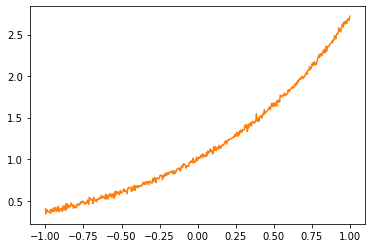

In [26]:
plt.plot(x_arr, y.squeeze(1))
plt.plot(x_arr, y_arr)

In [28]:
env.evo_step()

/home/grishakl/.local/lib/python3.8/site-packages/torch/nn/init.py:388: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [29]:
env.train_epoch()
env.validate_entities()

[0.8193382215499877,
 0.6635229539871216,
 0.8198240566253663,
 0.8191136074066161,
 0.4386515760421753,
 0.8191285181045533,
 0.1085951453447342,
 0.4741649103164673,
 0.40888100147247314,
 0.338895366191864,
 0.5784709119796754,
 0.011154318526387215,
 0.09445713877677916,
 0.026356259956955907,
 0.15543962597846986,
 0.7411324596405029]

In [34]:
for i in range(10):
    env.train_epoch()
    print(env.validate_entities())
    env.evo_step()
    print(f"Evo step: {i}")

[0.0422891965508461, 1.0396669578552244, 0.030537154525518417, 0.20365112662315368, 0.017557269111275673, 0.0394845125079155, 0.4176260685920715, 0.9123357868194579, 0.1304694128036499, 0.40259103059768675, 0.3519681143760681, 0.33919840335845947, 0.030339190214872358]
Evo step: 0
[0.2246376395225525, 0.15033210873603822, 0.42719244956970215, 0.2755017948150635, 0.026962548345327374, 0.040545593500137325, 0.4146311259269714, 0.40228495597839353, 0.10512838423252106, 0.45607321739196777, 0.40228560924530027, 1.3435991191864014, 0.2201255226135254, 0.495847520828247, 0.40228495597839353, 0.6687982845306396]
Evo step: 1


/home/grishakl/.local/lib/python3.8/site-packages/torch/nn/init.py:388: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


[0.11433065772056579, 0.10463815867900847, 0.2017181944847107, 0.2631603455543518, 0.025273885875940323, 0.057113953232765205, 1.0524173736572267, 0.40228493928909304, 0.41058114528656003, 0.3357116937637329, 0.40228493928909304, 0.6987426233291626, 0.2722913646697998, 0.7457553911209106, 0.40228493928909304, 0.46243826150894163, 0.8599285173416138, 0.4710676217079163, 0.7419516849517822]
Evo step: 2
[0.20438371896743773, 0.6028150987625123, 0.4949820518493652, 0.4037564206123352, 0.01737562283873558, 0.052550787031650545, 0.916776180267334, 0.4499661064147949, 0.41654244422912595, 0.10555970788002014, 0.4499661064147949, 0.5139051342010499, 0.23878662109375, 0.6929809761047363, 0.4499661064147949, 0.4452373933792114, 0.6397648906707764, 1.1102039623260498, 0.34129904747009276, 0.8890912532806396, 0.787715744972229, 0.11309765577316284]
Evo step: 3
[0.2787294387817383, 0.8155090761184691, 0.25755247116088864, 0.4022849678993225, 0.40276357412338254, 0.043707655370235445, 0.815511012077

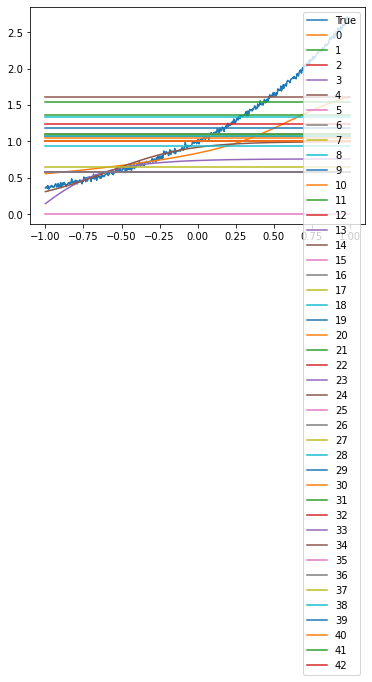

In [35]:
env.train_epoch()
plt.plot(x_arr, y_arr, label="True")
for i, ent in enumerate(env.entities):
    y = ent.predict(x_arr.unsqueeze(1))
    plt.plot(x_arr, y.squeeze(1), label=str(i))
plt.legend()
plt.show()

In [36]:
env = Environment(10, train_loader, train_epochs=100, validation_loader=val_loader)

cuda


Train time: 59 s


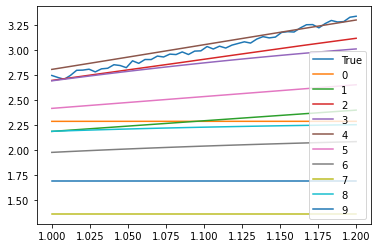

In [37]:
start_time = time.time()
env.train_epoch()
print(f"Train time: {(time.time() - start_time):.0f} s")
plt.plot(x_val, y_val, label="True")
for i, ent in enumerate(env.entities):
    y = ent.predict(x_val.unsqueeze(1))
    plt.plot(x_val, y.squeeze(1), label=str(i))
plt.legend()
plt.show()

[0.14468383073806762, 0.14358299136161806, 0.002868397608399391, 0.005906862104311585, 0.009533531069755555, 0.047893435657024384, 0.19463122010231018, 0.329080696105957, 0.15690672397613525, 0.3545556139945984]
Exec time: 79 s


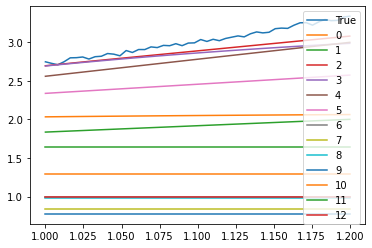

In [38]:
print(env.validate_entities())
start_time = time.time()
env.evo_step()
env.train_epoch()
print(f"Exec time: {(time.time() - start_time):.0f} s")
plt.plot(x_val, y_val, label="True")
for i, ent in enumerate(env.entities):
    y = ent.predict(x_val.unsqueeze(1))
    plt.plot(x_val, y.squeeze(1), label=str(i))
plt.legend()
plt.show()

In [41]:
x = torch.cat((x_arr, x_val))
y = torch.cat((y_arr, y_val))

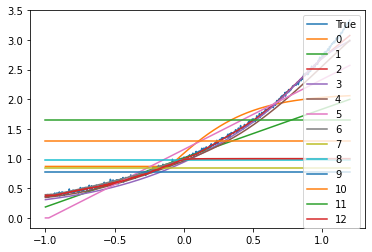

In [42]:
plt.plot(x, y, label="True")
for i, ent in enumerate(env.entities):
    y_pred = ent.predict(x.unsqueeze(1))
    plt.plot(x, y_pred.squeeze(1), label=str(i))
plt.legend()
plt.show()

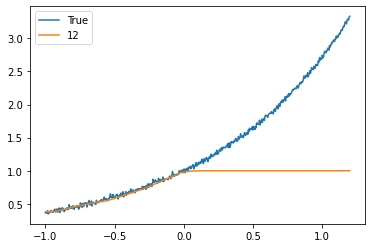

In [59]:
i = 12
m = env.entities[i]
plt.plot(x, y, label="True")
y_pred = m.predict(x.unsqueeze(1))
plt.plot(x, y_pred.squeeze(1), label=str(i))
plt.legend()
plt.show()